<a href="https://colab.research.google.com/github/Frmngh/Tugas-Metnum-Interpolasi/blob/main/Interpolasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Firman Gani Heriansyah - 21120122140111 - Kelas C

Polinom Langrange dan Polinom Newton

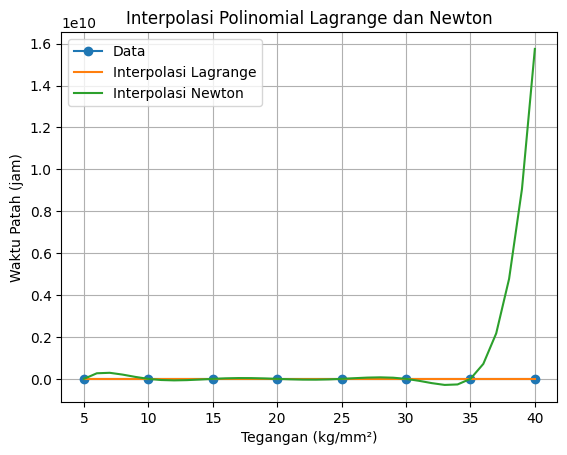

Nilai Interpolasi Lagrange:
[16.79100416 32.94053376 27.22683136]

Nilai Interpolasi Newton:
[-7.2334080e+07 -3.5642880e+07 -2.0357568e+08]

Nilai Actual:
[28 21 17]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data tegangan dan waktu patah
x = np.array([5, 10, 15, 20, 25, 30, 35, 40])
y = np.array([40, 30, 25, 40, 18, 20, 22, 15])

def interpolasi_lagrange(x, y, xi):
  """
  Fungsi untuk interpolasi polinomial Lagrange.

  Args:
    x: Array data tegangan (x).
    y: Array data waktu patah (y).
    xi: Titik interpolasi.

  Returns:
    yi: Nilai interpolasi pada titik xi.
  """
  n = len(x)
  yi = 0
  for i in range(n):
    li = 1
    for j in range(n):
      if j != i:
        li *= (xi - x[j]) / (x[i] - x[j])
    yi += y[i] * li
  return yi

def interpolasi_newton(x, y, xi):
  """
  Fungsi untuk interpolasi polinomial Newton.

  Args:
    x: Array data tegangan (x).
    y: Array data waktu patah (y).
    xi: Titik interpolasi.

  Returns:
    yi: Nilai interpolasi pada titik xi.
  """
  n = len(x)
  a = np.zeros(n)
  a[0] = y[0]

  # Menghitung koefisien polinomial Newton
  for i in range(1, n):
    for j in range(i):
      a[i] -= y[j] / (x[i] - x[j])

  # Menghitung nilai interpolasi
  yi = a[0]
  for i in range(1, n):
    yi *= (xi - x[i-1])
  return yi

# Menghitung nilai interpolasi untuk x = 5 <= x <= 40
xi = np.arange(5, 41, 1)
yi_lagrange = interpolasi_lagrange(x, y, xi)
yi_newton = interpolasi_newton(x, y, xi)

# Menampilkan grafik interpolasi
plt.plot(x, y, 'o-', label='Data')
plt.plot(xi, yi_lagrange, label='Interpolasi Lagrange')
plt.plot(xi, yi_newton, label='Interpolasi Newton')
plt.xlabel('Tegangan (kg/mm²)')
plt.ylabel('Waktu Patah (jam)')
plt.title('Interpolasi Polinomial Lagrange dan Newton')
plt.legend()
plt.grid()
plt.show()

# Kode testing untuk menguji kode interpolasi

# Mendefinisikan data uji
x_test = np.array([12, 22, 32])
y_test = np.array([28, 21, 17])

# Menghitung nilai interpolasi menggunakan interpolasi Lagrange
yi_test_lagrange = interpolasi_lagrange(x, y, x_test)

# Menghitung nilai interpolasi menggunakan interpolasi Newton
yi_test_newton = interpolasi_newton(x, y, x_test)

# Menampilkan hasil testing
print("Nilai Interpolasi Lagrange:")
print(yi_test_lagrange)

print("\nNilai Interpolasi Newton:")
print(yi_test_newton)

print("\nNilai Actual:")
print(y_test)
